In [1]:
#Universidad del Valle de Guatemala
#Fernando Garavito 
#Jose Ponce
#Gabriel Quiroz

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn import metrics
import os
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
img_path = 'malimg_paper_dataset_imgs'

In [7]:

AAA = ImageDataGenerator().flow_from_directory(directory=img_path, target_size=(64,64), batch_size=100000)


AAA.class_indices

Found 9339 images belonging to 25 classes.


{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [2]:
data_dir = './malimg_paper_dataset_imgs'
familias_malware = os.listdir(data_dir)
familias_malware.remove('malimg_dataset_readme.txt')

In [3]:
for familia in familias_malware:
    if(familia != 'malimg_dataset_readme.txt'):
        print(f'{familia}: {len(os.listdir(os.path.join(data_dir, familia)))}')

Adialer.C: 122
Agent.FYI: 116
Allaple.A: 2949
Allaple.L: 1591
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.gen!g: 200
C2LOP.P: 146
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 800


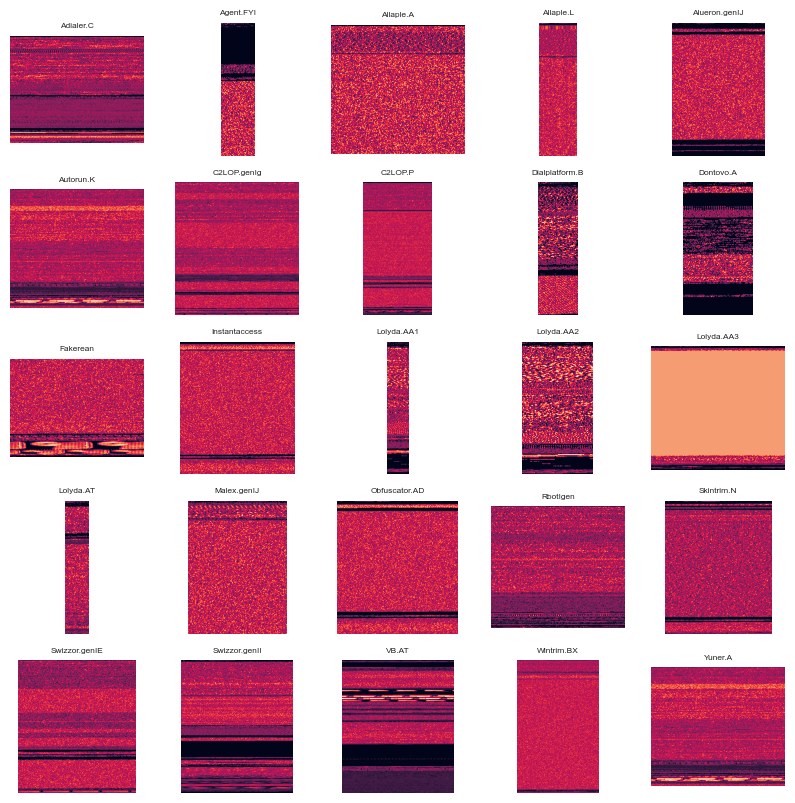

In [30]:
# Crear la figura y los subplots
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

# Añadir las imágenes y los títulos a los subplots
for i, familia in enumerate(familias_malware):
    # Obtener la ruta de la primera imagen de la familia de malware
    ruta_imagen = os.path.join(data_dir, familia, os.listdir(os.path.join(data_dir, familia))[0])
    
    # Leer la imagen y añadirla al subplot correspondiente
    imagen = plt.imread(ruta_imagen)
    fila = i // 5
    columna = i % 5
    axs[fila, columna].imshow(imagen)
    
    # Añadir el título al subplot correspondiente
    axs[fila, columna].set_title(familia)
    axs[fila, columna].axis('off')

# Mostrar la figura
plt.show()

In [8]:
X, y = AAA.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Definir la arquitectura de la red neuronal
modelo = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)), # Capa convolucional con 32 filtros de 3x3 y función de activación relu
    MaxPooling2D(2,2), # Capa de submuestreo con ventana de 2x2
    Conv2D(64, (3,3), activation='relu'), # Capa convolucional con 64 filtros de 3x3 y función de activación relu
    MaxPooling2D(2,2), # Capa de submuestreo con ventana de 2x2
    Flatten(), # Capa de aplanamiento de los datos
    Dense(128, activation='relu'), # Capa oculta con 128 neuronas y función de activación relu
    Dense(len(AAA.class_indices), activation='softmax') # Capa de salida con una neurona por clase y función de activación softmax
])

In [39]:
# Compilar el modelo con un optimizador, función de pérdida y métricas de evaluación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [40]:
history = modelo.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
205/205 [==============================] - 13s 62ms/step - loss: 10.7700 - accuracy: 0.6618 - val_loss: 0.7393 - val_accuracy: 0.7630
Epoch 2/10
205/205 [==============================] - 12s 60ms/step - loss: 0.4134 - accuracy: 0.8773 - val_loss: 0.6249 - val_accuracy: 0.8312
Epoch 3/10
205/205 [==============================] - 12s 60ms/step - loss: 0.2118 - accuracy: 0.9361 - val_loss: 0.3072 - val_accuracy: 0.9129
Epoch 4/10
205/205 [==============================] - 12s 60ms/step - loss: 0.1271 - accuracy: 0.9621 - val_loss: 0.3475 - val_accuracy: 0.9261
Epoch 5/10
205/205 [==============================] - 13s 62ms/step - loss: 0.0848 - accuracy: 0.9751 - val_loss: 0.3008 - val_accuracy: 0.9290
Epoch 6/10
205/205 [==============================] - 12s 60ms/step - loss: 0.0592 - accuracy: 0.9824 - val_loss: 0.3591 - val_accuracy: 0.9290
Epoch 7/10
205/205 [==============================] - 13s 61ms/step - loss: 0.1786 - accuracy: 0.9578 - val_loss: 0.3727 - val_accuracy

In [41]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

88/88 [==============================] - 1s 10ms/step - loss: 0.3298 - accuracy: 0.9447
Loss: 0.3298, Accuracy: 0.9447


In [44]:
y_pred = np.argmax(modelo.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
unique_labels = np.unique(y_true)
unique_class_names = [list(AAA.class_indices.keys())[i] for i in unique_labels]
print(classification_report(y_true, y_pred, labels=unique_labels, target_names=unique_class_names))
print(confusion_matrix(y_true, y_pred, labels=unique_labels))

88/88 [==============================] - 1s 9ms/step
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        41
     Agent.FYI       1.00      1.00      1.00        28
     Allaple.A       0.97      0.99      0.98       904
     Allaple.L       0.99      0.95      0.97       466
 Alueron.gen!J       0.97      0.97      0.97        69
     Autorun.K       0.00      0.00      0.00        34
       C2LOP.P       0.71      0.55      0.62        55
   C2LOP.gen!g       0.70      0.81      0.75        57
Dialplatform.B       1.00      1.00      1.00        46
     Dontovo.A       1.00      0.98      0.99        42
      Fakerean       0.98      1.00      0.99       103
 Instantaccess       1.00      1.00      1.00       141
    Lolyda.AA1       0.99      0.99      0.99        73
    Lolyda.AA2       1.00      0.98      0.99        54
    Lolyda.AA3       0.97      0.97      0.97        39
     Lolyda.AT       0.98      1.00      0.99     

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

En general se clasificaron correctamente los malwares y el modelo presenta un accuracy muy bueno y poca perdida. Hay un problema con que el malware C2LOP.gen!g se confunde con C2LOP, una razon de esto podria ser que es porque pertenecen a la misma familia lo que hace que tengan caracteristicas similares. De igual forma los resultados fueron bastante buenos 